In [11]:

import numpy as np 
from glob import glob 
import matplotlib 

import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 


work_dir="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_comparisons"
dataframe_dir   =work_dir+"/dataframes"
out_dir         =work_dir+"/out"
plot_dir        =work_dir+"/plots_001"
data_dir        =work_dir+"/data"

#os.makedirs(plot_dir, exist_ok=True)
lab_dict_full = pd.read_csv("/home/kleinrl/projects/laminar_fmri/tools/LUT_hcp-mmp-b_v2.txt",sep=" ", header=None, names=["id", "lab", "a", "b", "c","d"])
lab_dict_full = dict(zip(lab_dict_full['id'].to_list(), lab_dict_full['lab'].to_list()))

lab_dict = {
1090:"L_10pp",
#1088:"L_10v", 
#1065:"L_10r", 
#1072:"L_10d",  
1087:"L_9a",  
#1071:"L_9p",  
#1069:"L_9m",  
#1086:"L_9-46d",  
1070:"L_8BL",  
#1063:"L_8BM",  
#1067:"L_8Av",  
#1073:"L_8C",  
#1068:"L_8Ad",  
1010:"L_FEF",  
#1042:"L_7AL",  
#1047:"L_7PC",  
1046:"L_7PL",  
#1029:"L_7Pm",  
#1045:"L_7Am",  
#1030:"L_7m",  
1006:"L_V4",  
#1007:"L_V8",  
#1016:"L_V7",  
#1003:"L_V6",  
1153:"L_V6A",  
1023:"L_MT",  

#8109:"lh.LGN",  

1001:"L_V1",  
#1004:"L_V2",  
1005:"L_V3",  
#1013:"L_V3A",  
#1019:"L_V3B",  
#1159:"L_V3CD",  

#1048:"L_LIPv",  
1095:"L_LIPd", 
}
inv_lab_dict = {v: k for k, v in lab_dict.items()}

ids, labs = [],[]
for k,v in lab_dict.items():
    ids.append(k), labs.append(v)

len_x, len_y = 3, 5 


fsl_base=data_dir+"/feat_001"
df_tstat        =fsl_base+"/stats/tstat1-sub-02_layers-parc_hcp_kenshu-means.npy"
df_zstat        =fsl_base+"/stats/zstat1-sub-02_layers-parc_hcp_kenshu-means.npy"
df_pe           =fsl_base+"/stats/pe1-sub-02_layers-parc_hcp_kenshu-means.npy"
df_thresh_zstat =fsl_base+"/thresh_zstat1-sub-02_layers-parc_hcp_kenshu-means.npy"

#raw 
f="raw_pca001_v2"
tr="TR5"

df_corr=out_dir+'/{}/sub-02_ses-04_task-movie_run-04_VASO-sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_001.1D-CORR-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
df_corr_deconv_coefs=out_dir+'/{}/deconv_{}_Coef-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
df_corr_deconv_fstat=out_dir+'/{}/deconv_{}_Fstat-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
df_corr_deconv_fullr2=out_dir+'/{}/deconv_{}_FULLR2-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)

# preprocessed
f="preprocessed_pca001_v2"
tr="TR5"

df_corr_preproc=out_dir+"/{}/prewhitened_sub-02_ses-04_task-movie_run-04_VASO-prewhitened_sub-02_ses-04_task-movie_run-04_VASO-1010.L_FEF.2D.pca_001.1D-CORR-sub-02_layers-parc_hcp_kenshu-means.npy".format(f)
df_corr_preproc_deconv_coefs=out_dir+'/{}/deconv_{}_Coef-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
df_corr_preproc_deconv_fstat=out_dir+'/{}/deconv_{}_Fstat-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)
df_corr_preproc_deconv_fullr2=out_dir+'/{}/deconv_{}_FULLR2-sub-02_layers-parc_hcp_kenshu-means.npy'.format(f, tr)






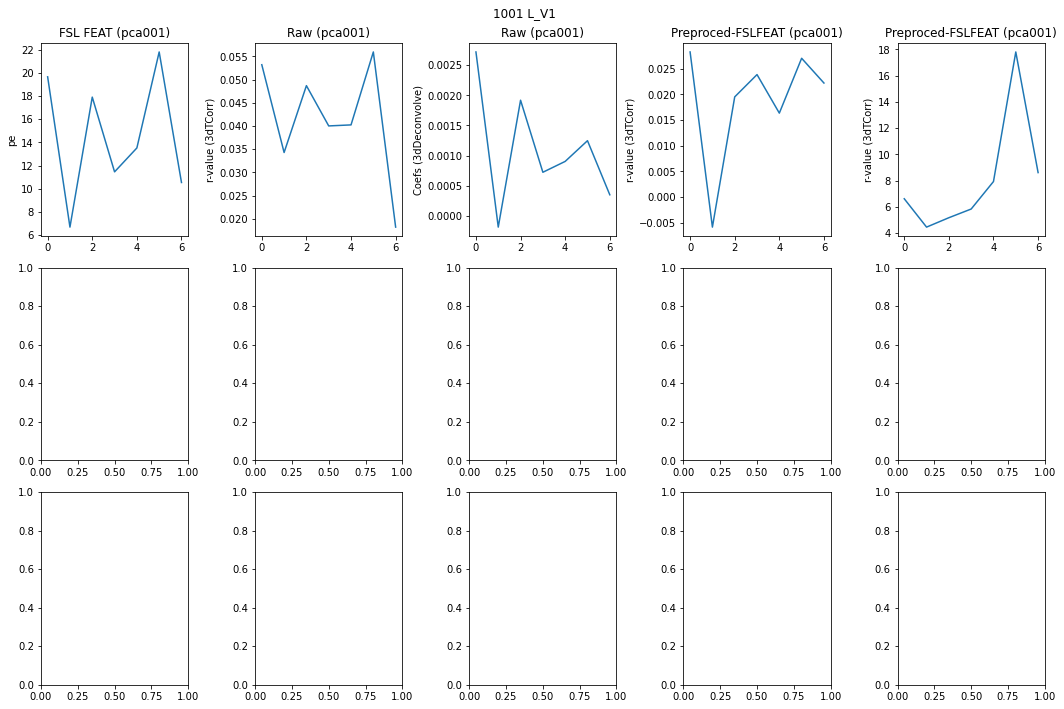

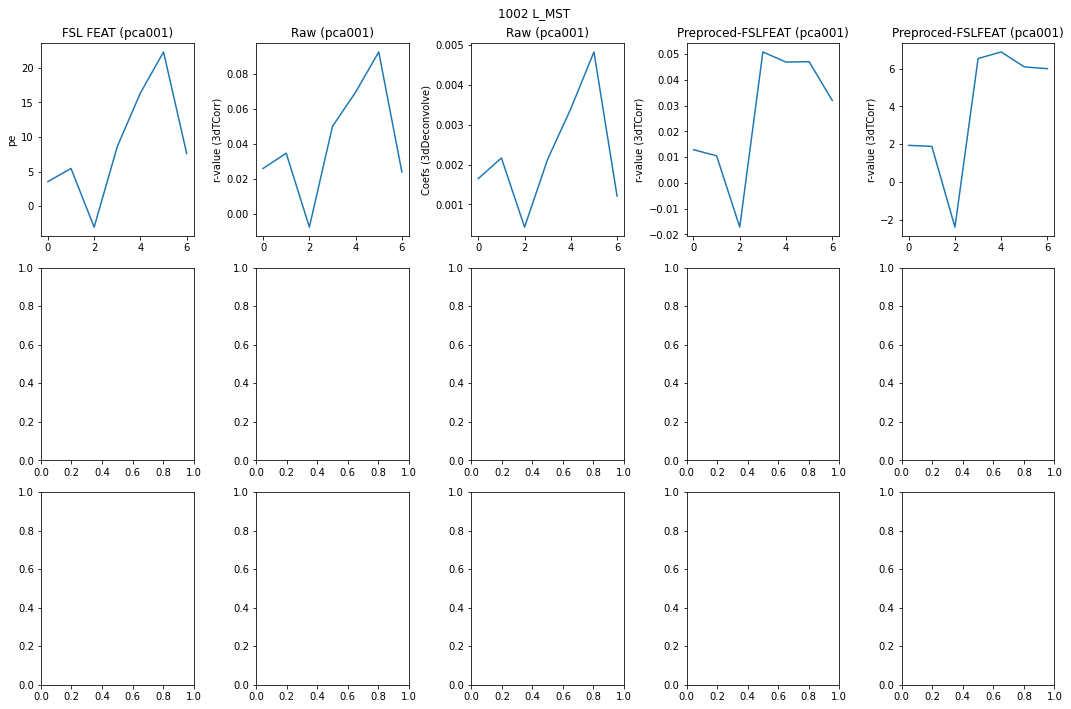

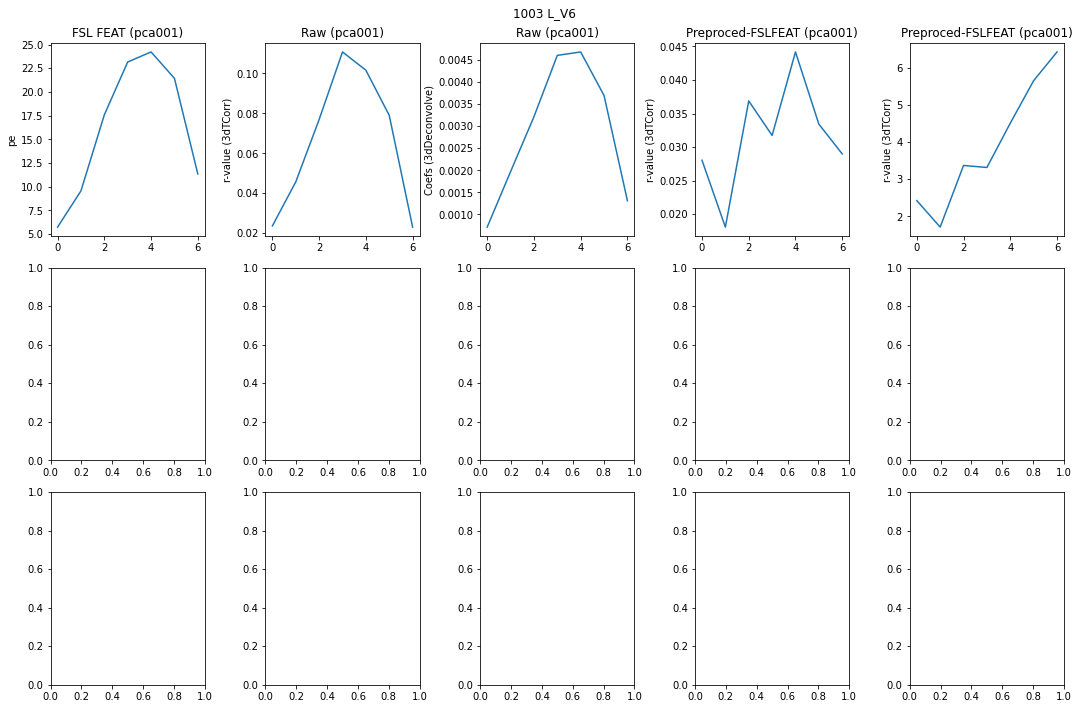

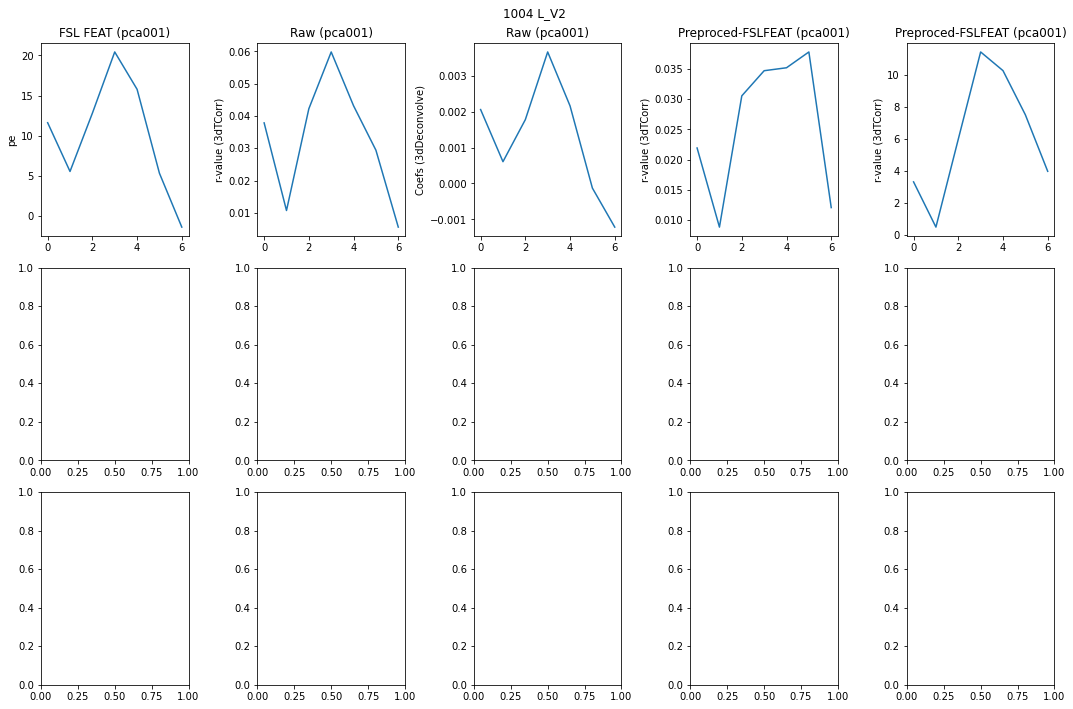

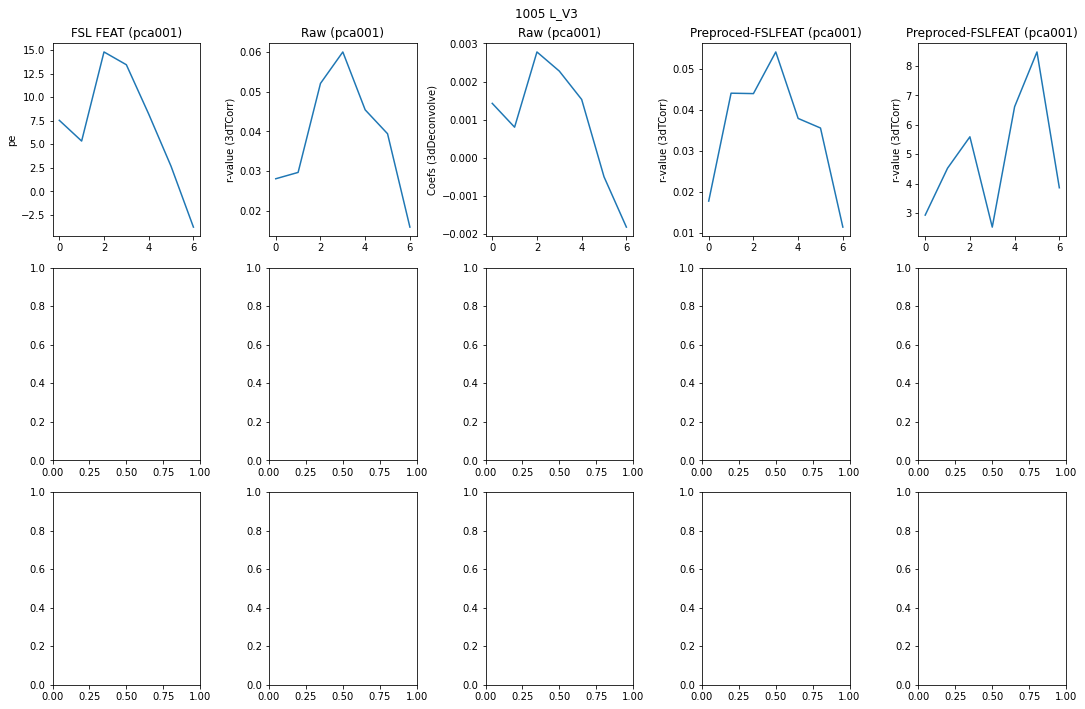

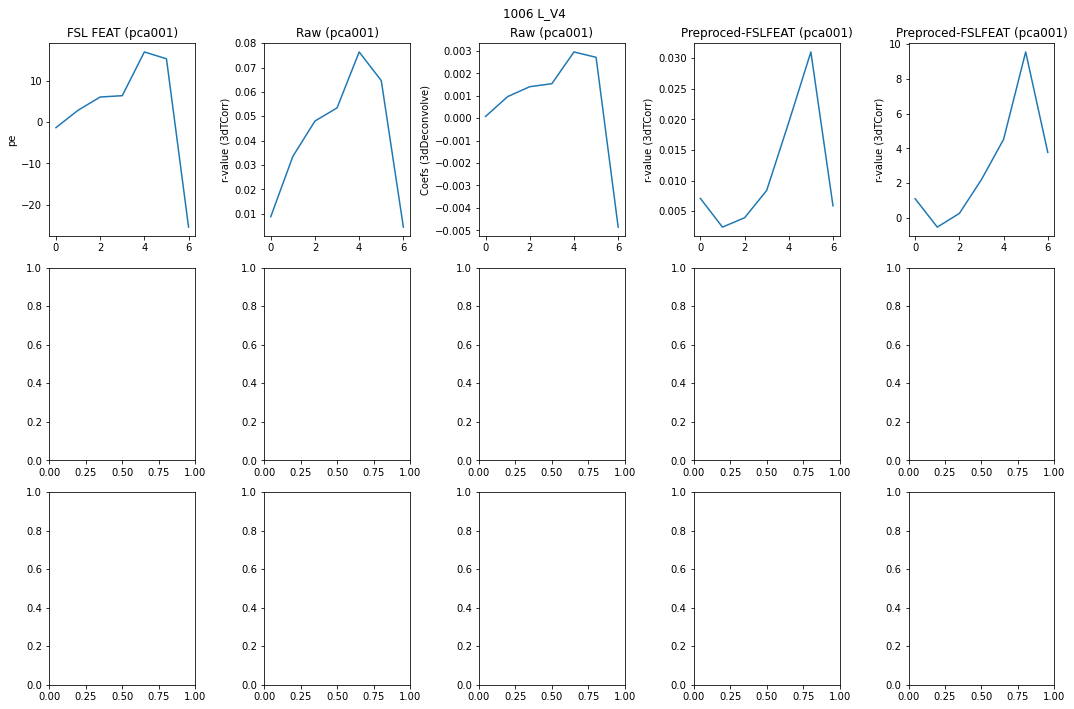

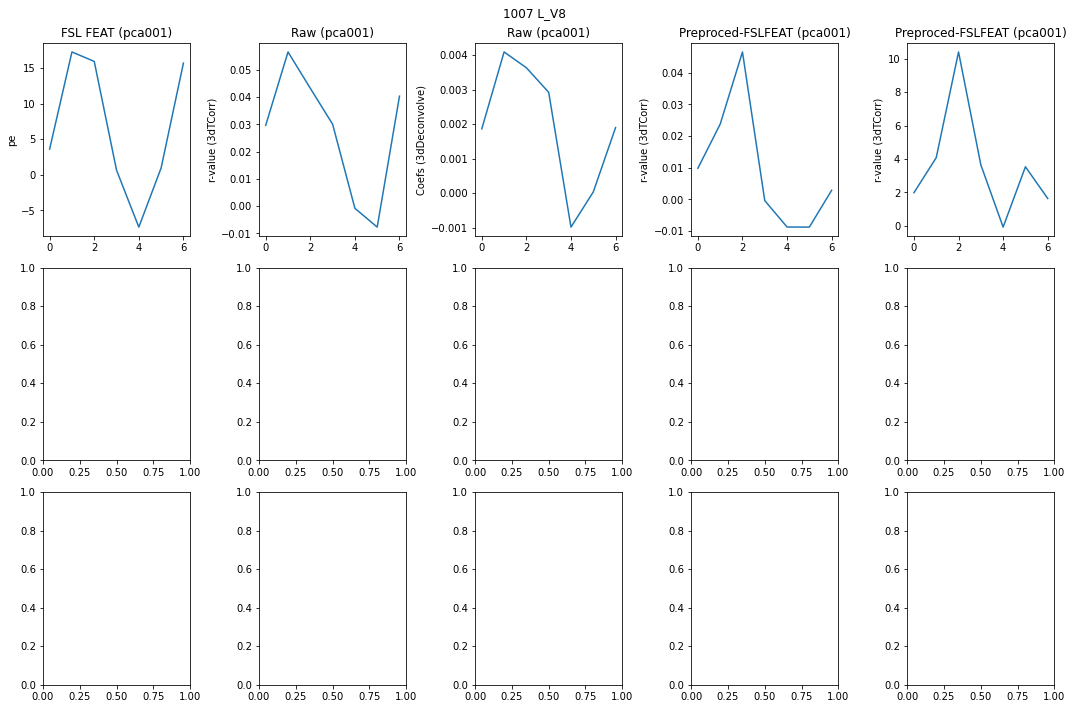

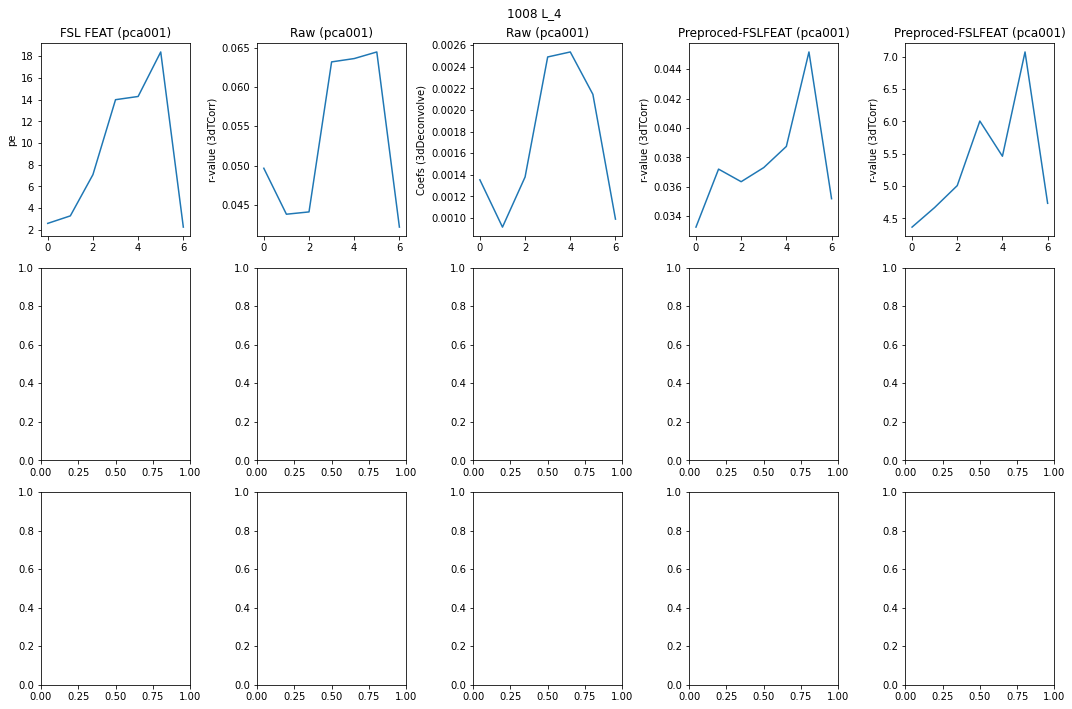

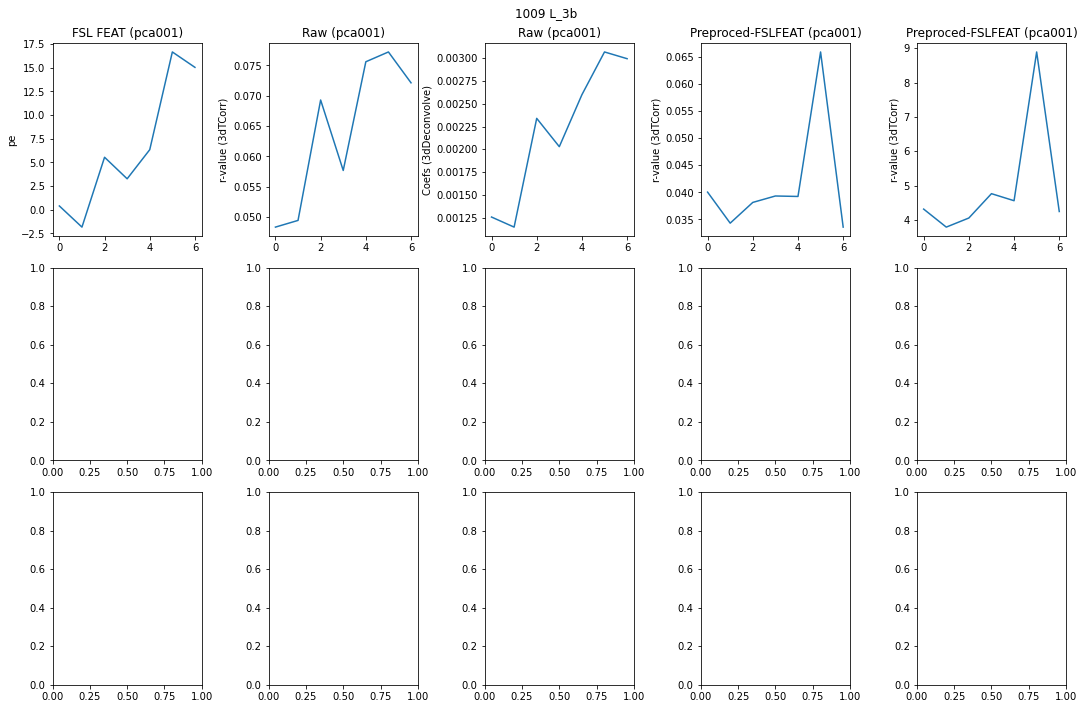

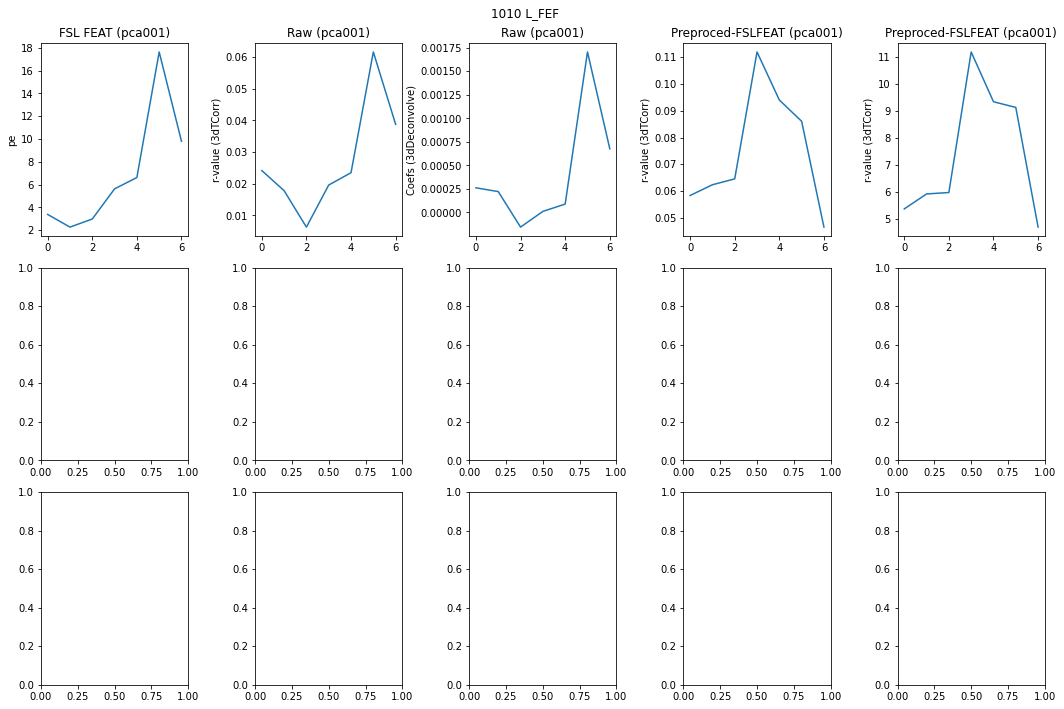

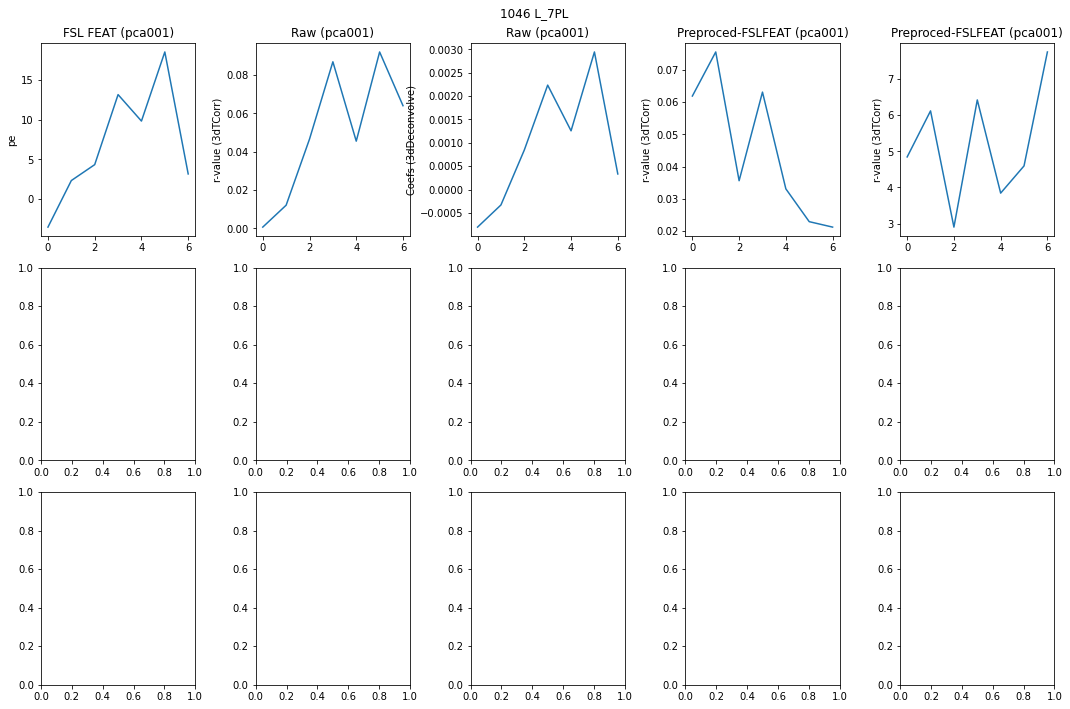

In [25]:
lab_inds = [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1046] 
#lab_inds = lab_inds[0]
for target_id in lab_inds:

    target_lab = lab_dict_full[ target_id ]

    fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(15,10)) #, #len_x,len_y
    fig.suptitle('{} {} '.format(target_id, target_lab))

    d_pe                        = np.load(df_pe)[:,1:][target_id, : ]
    d_zstat_thresh              = np.load(df_thresh_zstat)[:,1:][target_id, : ]
    d_zstat                     = np.load(df_zstat)[:,1:][target_id, : ]
    d_tstat                     = np.load(df_tstat)[:,1:][target_id, : ]

    d_corr                      =np.load(df_corr)[:,1:][target_id, : ]
    d_corr_deconv_coefs         =np.load(df_corr_deconv_coefs)[:,1:][target_id, : ]
    d_corr_deconv_fullr2        =np.load(df_corr_deconv_fullr2)[:,1:] [target_id, : ]

    # preprocessed
    d_corr_preproc              =np.load(df_corr_preproc)[:,1:][target_id, : ]
    d_corr_preproc_deconv_coefs =np.load(df_corr_preproc_deconv_coefs)[:,1:][target_id, : ]
    d_corr_preproc_deconv_fullr2=np.load(df_corr_preproc_deconv_fullr2)[:,1:][target_id, : ]


    # axs[0,0].plot(d_tstat)
    # axs[0,0].title.set_text("t-stat")
    axs[0,0].plot(d_pe)
    axs[0,0].title.set_text("FSL FEAT (pca001)")
    axs[0,0].set_ylabel("pe")

    # axs[1,0].plot(d_zstat)
    # axs[1,0].set_ylabel("z-stat")

    # axs[2,0].plot(d_zstat_thresh)
    # axs[2,0].set_ylabel("z-stat_thresh")
    

    axs[0,1].plot(d_corr)
    axs[0,1].title.set_text("Raw (pca001)")
    axs[0,1].set_ylabel("r-value (3dTCorr)")

    axs[0,2].plot(d_corr_deconv_coefs)
    axs[0,2].title.set_text("Raw (pca001)")
    axs[0,2].set_ylabel("Coefs (3dDeconvolve)")

    #axs[1,2].plot(d_corr_deconv_fullr2)
    #axs[1,2].title.set_text("raw_deconv_fullr2")

    axs[0,3].plot(d_corr_preproc)
    axs[0,3].title.set_text("Preproced-FSLFEAT (pca001)")
    axs[0,3].set_ylabel("r-value (3dTCorr)")

    axs[0,4].plot(d_corr_preproc_deconv_coefs)
    axs[0,4].title.set_text("Preproced-FSLFEAT (pca001)")
    axs[0,4].set_ylabel("r-value (3dTCorr)")
    
    plt.tight_layout()

    #axs[2,2].plot(d_corr_preproc_deconv_fullr2)
    #axs[2,2].title.set_text("preproc_deconv_fullr2")

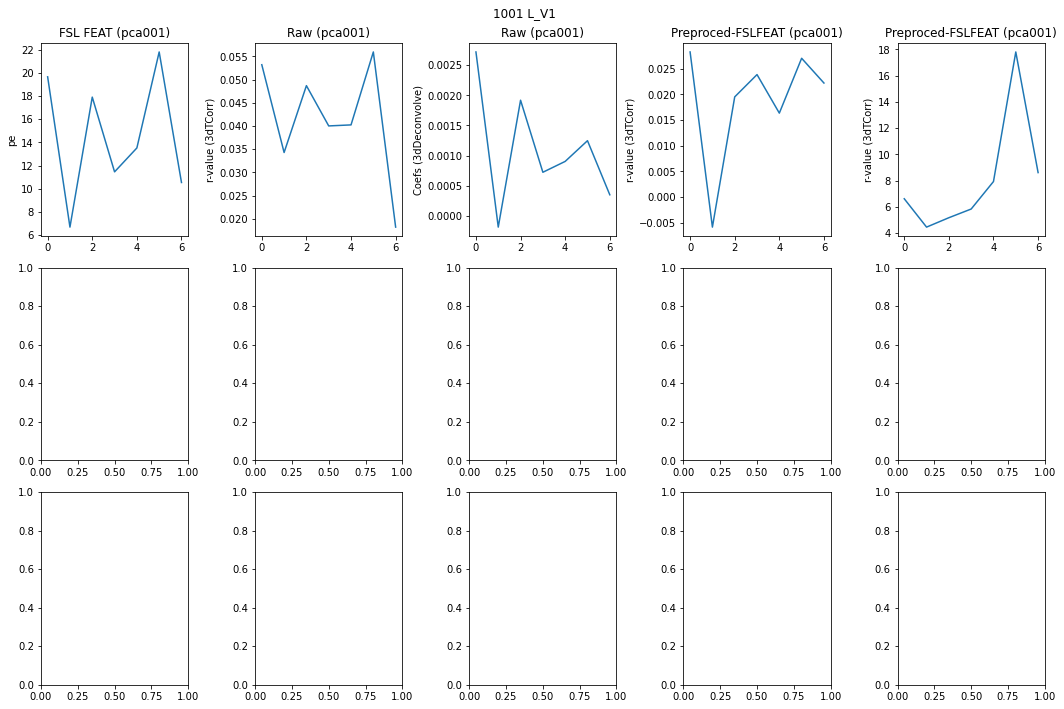

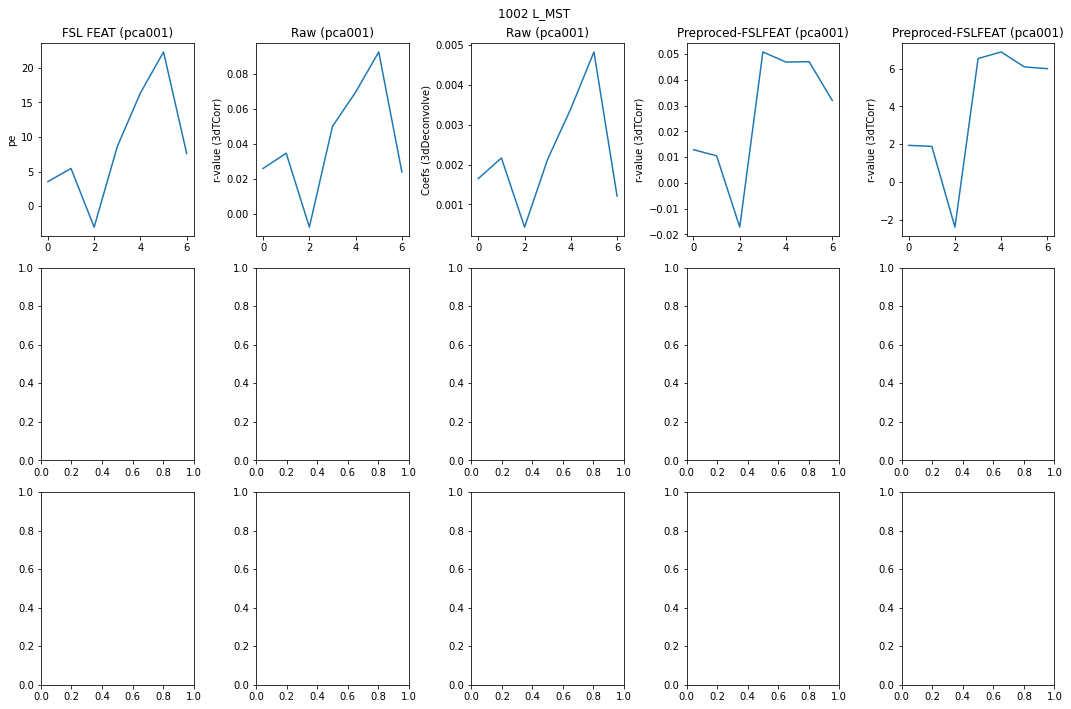

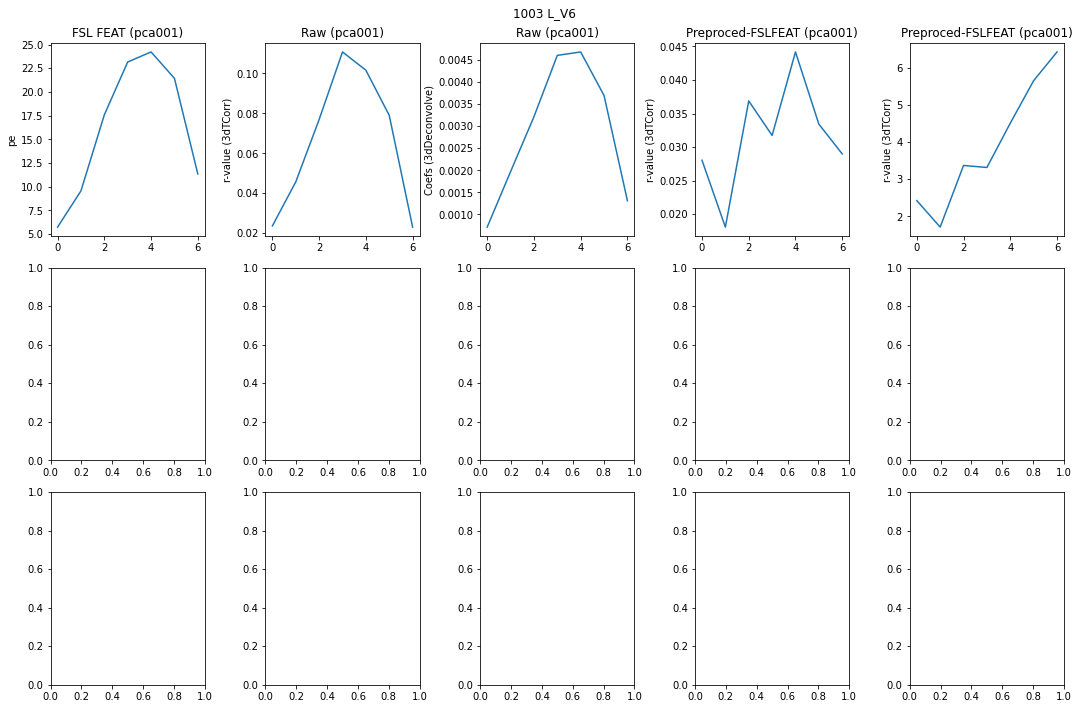

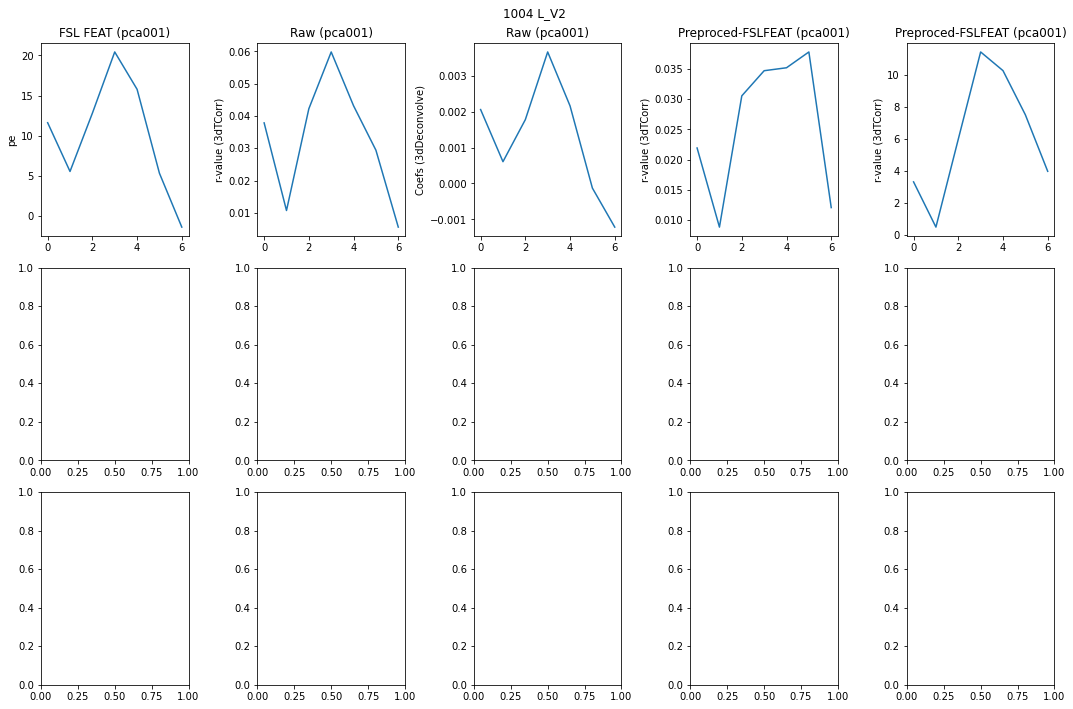

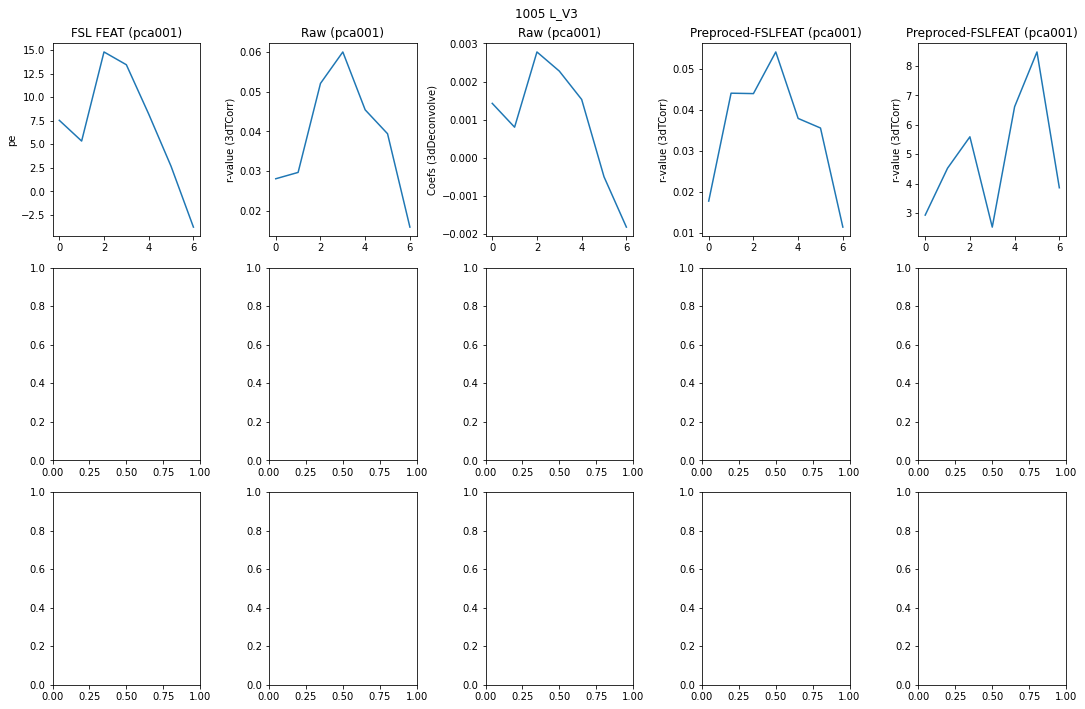

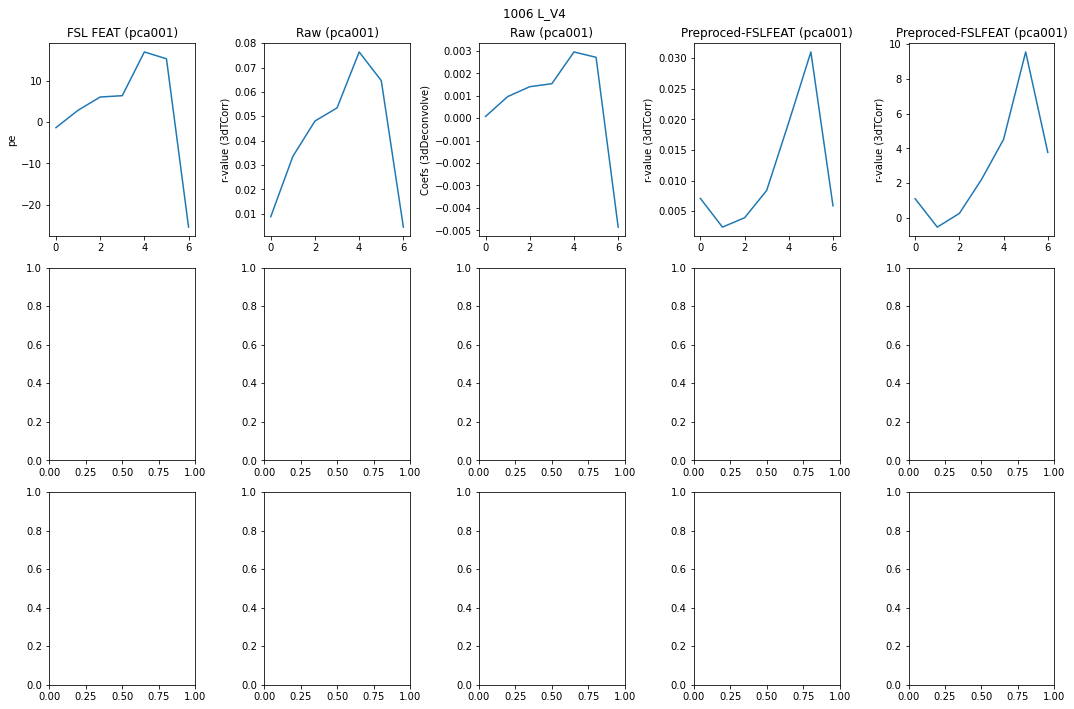

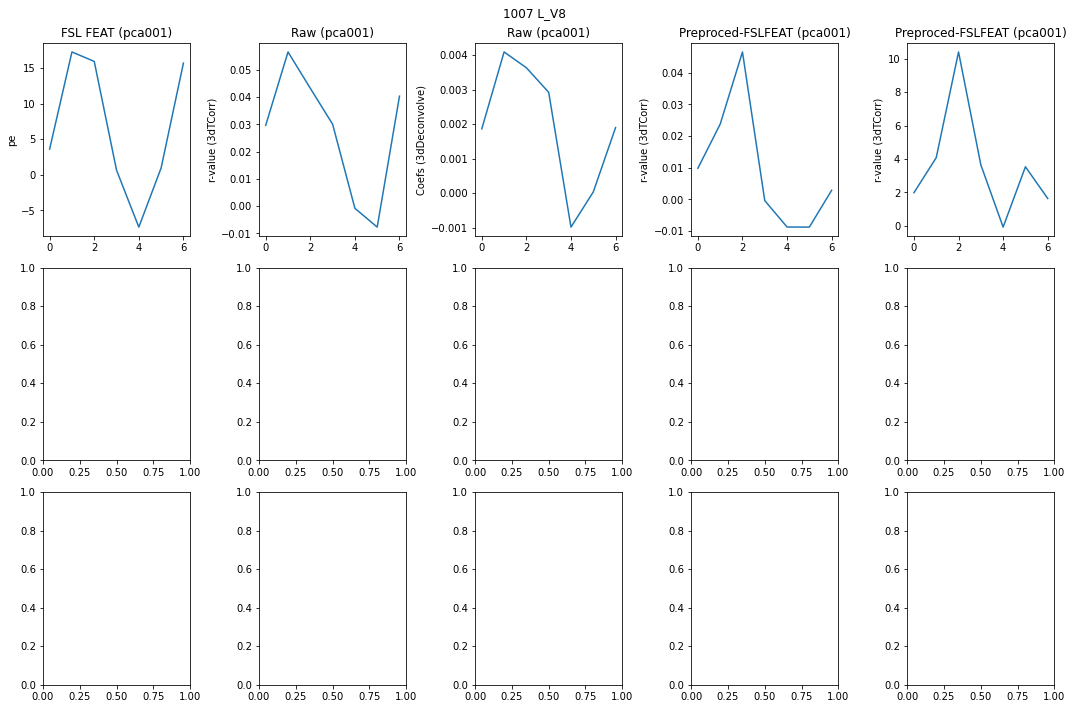

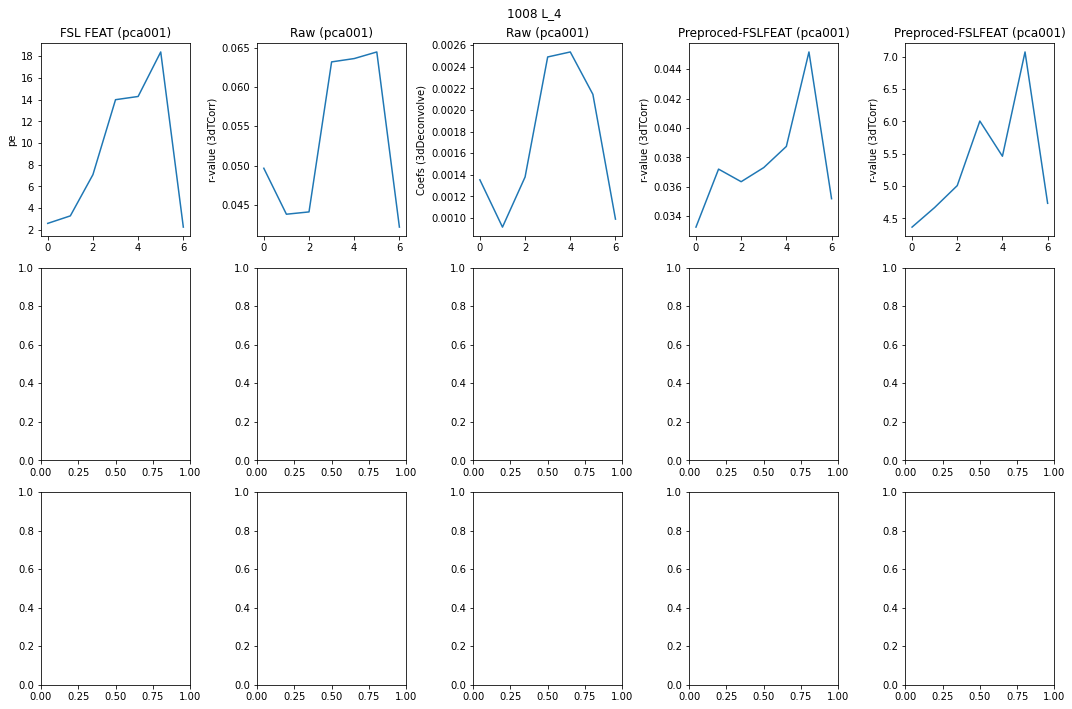

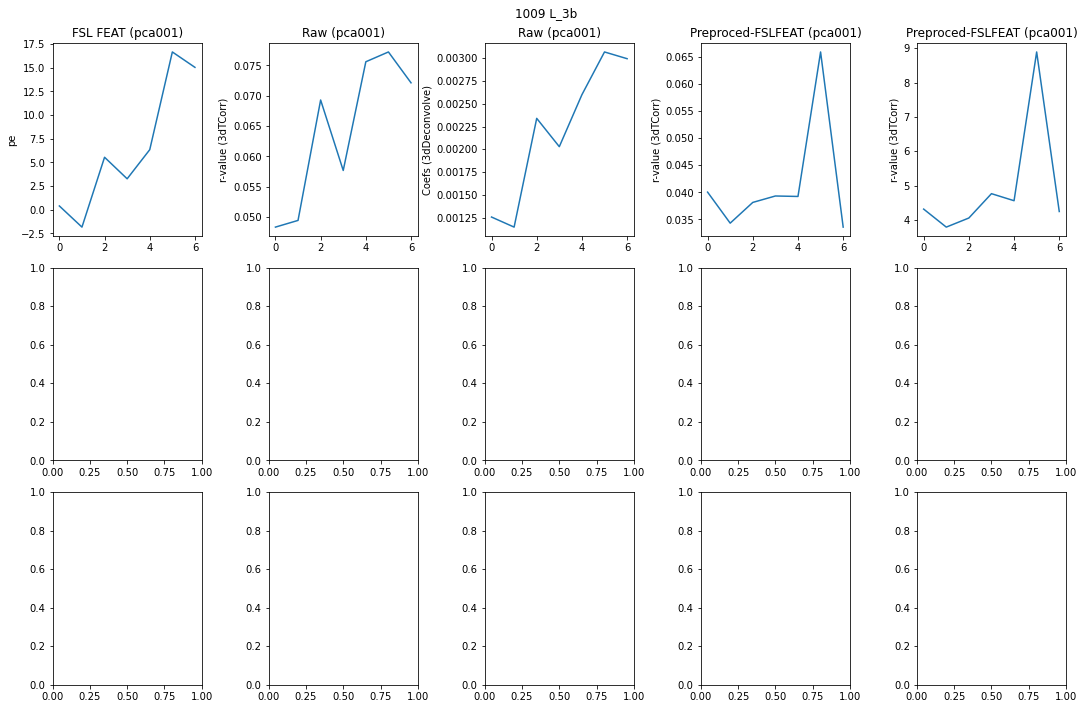

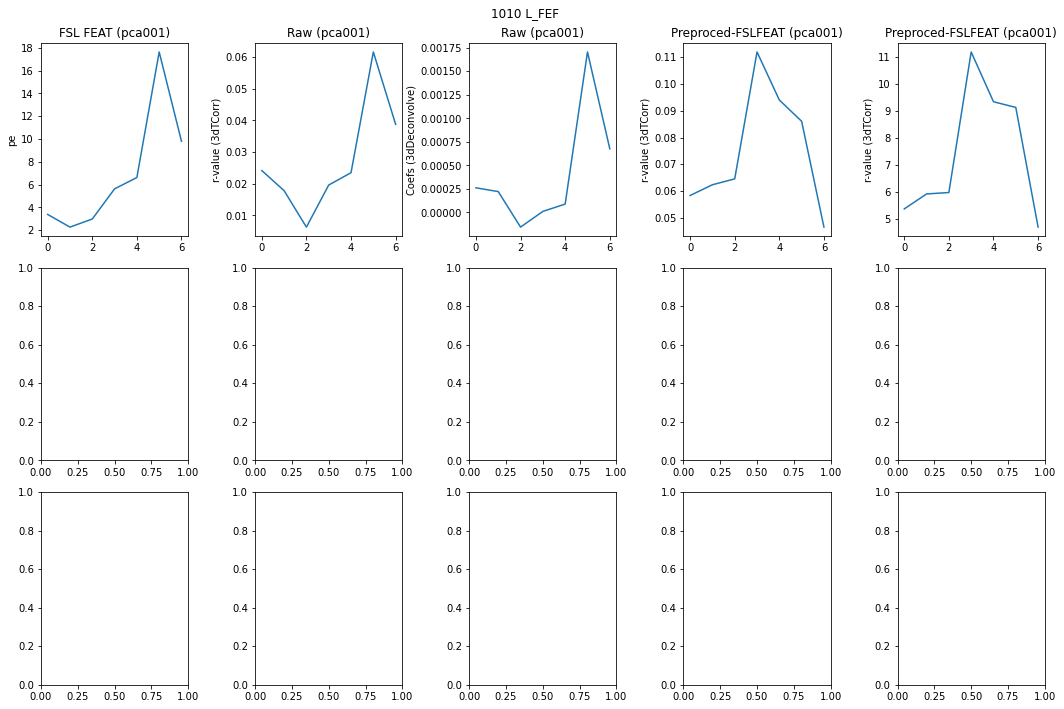

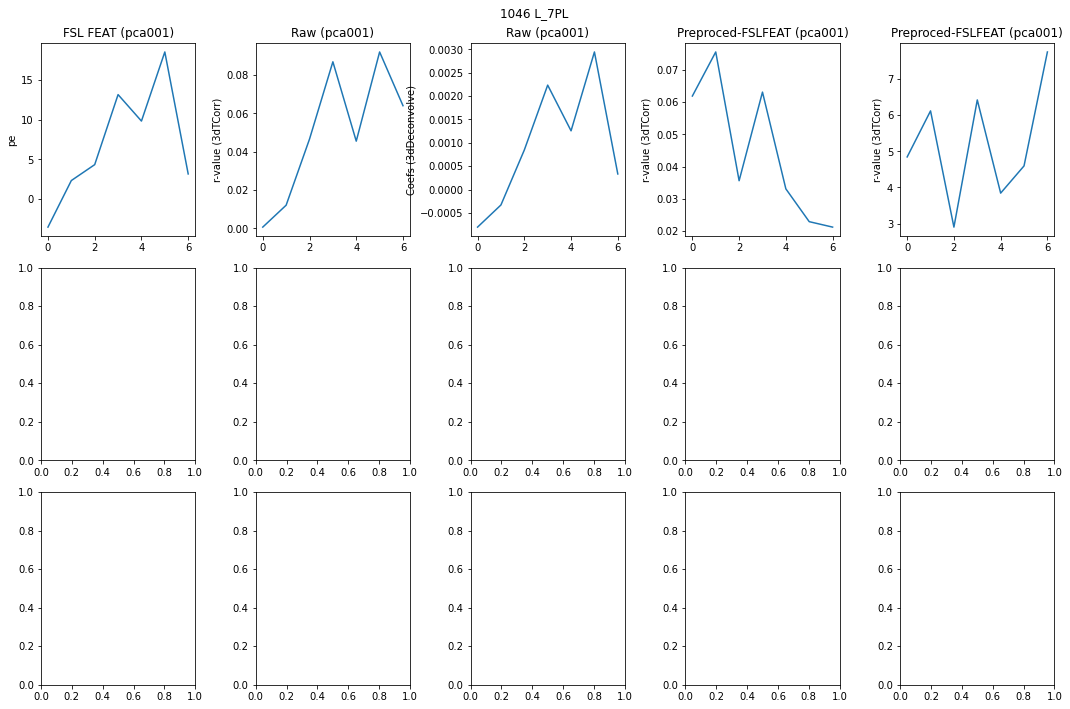

In [43]:
lab_inds = [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1046] 
#lab_inds = lab_inds[0]
for target_id in lab_inds:

    target_lab = lab_dict_full[ target_id ]

    fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(15,10)) #, #len_x,len_y
    fig.suptitle('{} {} '.format(target_id, target_lab))

    d_pe                        = np.load(df_pe)[:,1:][target_id, : ]
    d_zstat_thresh              = np.load(df_thresh_zstat)[:,1:][target_id, : ]
    d_zstat                     = np.load(df_zstat)[:,1:][target_id, : ]
    d_tstat                     = np.load(df_tstat)[:,1:][target_id, : ]

    d_corr                      =np.load(df_corr)[:,1:][target_id, : ]
    d_corr_deconv_coefs         =np.load(df_corr_deconv_coefs)[:,1:][target_id, : ]
    d_corr_deconv_fullr2        =np.load(df_corr_deconv_fullr2)[:,1:] [target_id, : ]

    # preprocessed
    d_corr_preproc              =np.load(df_corr_preproc)[:,1:][target_id, : ]
    d_corr_preproc_deconv_coefs =np.load(df_corr_preproc_deconv_coefs)[:,1:][target_id, : ]
    d_corr_preproc_deconv_fullr2=np.load(df_corr_preproc_deconv_fullr2)[:,1:][target_id, : ]


    # axs[0,0].plot(d_tstat)
    # axs[0,0].title.set_text("t-stat")
    axs[0,0].plot(d_pe)
    axs[0,0].title.set_text("FSL FEAT (pca001)")
    axs[0,0].set_ylabel("pe")

    # axs[1,0].plot(d_zstat)
    # axs[1,0].set_ylabel("z-stat")

    # axs[2,0].plot(d_zstat_thresh)
    # axs[2,0].set_ylabel("z-stat_thresh")
    

    axs[0,1].plot(d_corr)
    axs[0,1].title.set_text("Raw (pca001)")
    axs[0,1].set_ylabel("r-value (3dTCorr)")

    axs[0,2].plot(d_corr_deconv_coefs)
    axs[0,2].title.set_text("Raw (pca001)")
    axs[0,2].set_ylabel("Coefs (3dDeconvolve)")

    #axs[1,2].plot(d_corr_deconv_fullr2)
    #axs[1,2].title.set_text("raw_deconv_fullr2")

    axs[0,3].plot(d_corr_preproc)
    axs[0,3].title.set_text("Preproced-FSLFEAT (pca001)")
    axs[0,3].set_ylabel("r-value (3dTCorr)")

    axs[0,4].plot(d_corr_preproc_deconv_coefs)
    axs[0,4].title.set_text("Preproced-FSLFEAT (pca001)")
    axs[0,4].set_ylabel("r-value (3dTCorr)")
    
    plt.tight_layout()

    #axs[2,2].plot(d_corr_preproc_deconv_fullr2)
    #axs[2,2].title.set_text("preproc_deconv_fullr2")

0 1001 L_V1
1 1002 L_MST
2 1006 L_V4
3 1007 L_V8
4 1008 L_4
5 1009 L_3b
6 1010 L_FEF
7 1046 L_7PL
8 1049 L_VIP
9 1048 L_LIPv


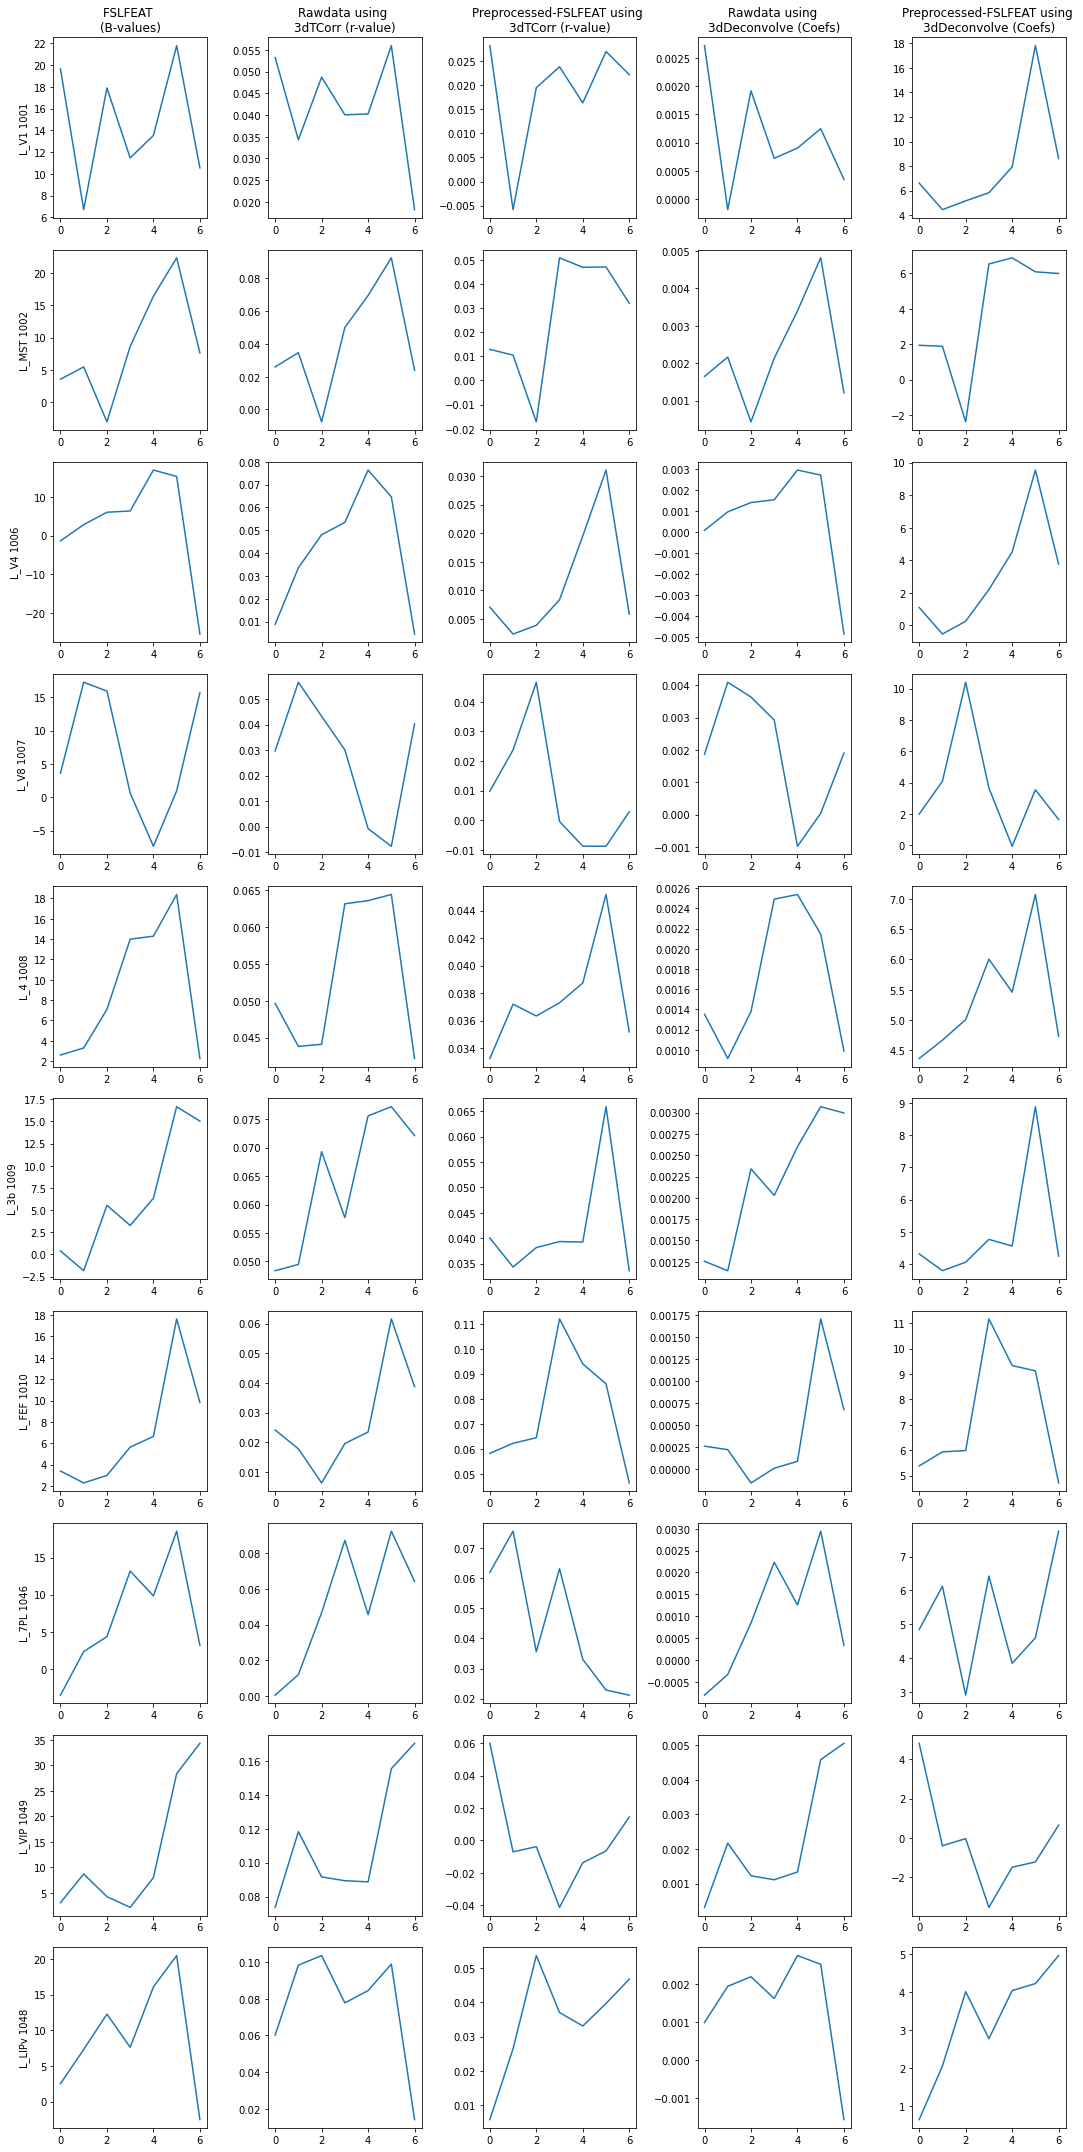

In [42]:
lab_inds = [1001, 1002, 1006, 1007, 1008, 1009, 1010, 1046, 1049, 1048] 
# 1003, 1004, 1005, 
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(15,30)) #, #len_x,len_y

for i in range(10):

    target_id = lab_inds[i]
    target_lab = lab_dict_full[ target_id ]

    print(i, target_id, target_lab)

    
    #fig.suptitle('{} {} '.format(target_id, target_lab))

    d_pe                        = np.load(df_pe)[:,1:][target_id, : ]
    d_zstat_thresh              = np.load(df_thresh_zstat)[:,1:][target_id, : ]
    d_zstat                     = np.load(df_zstat)[:,1:][target_id, : ]
    d_tstat                     = np.load(df_tstat)[:,1:][target_id, : ]

    d_corr                      =np.load(df_corr)[:,1:][target_id, : ]
    d_corr_deconv_coefs         =np.load(df_corr_deconv_coefs)[:,1:][target_id, : ]
    d_corr_deconv_fullr2        =np.load(df_corr_deconv_fullr2)[:,1:] [target_id, : ]

    # preprocessed
    d_corr_preproc              =np.load(df_corr_preproc)[:,1:][target_id, : ]
    d_corr_preproc_deconv_coefs =np.load(df_corr_preproc_deconv_coefs)[:,1:][target_id, : ]
    d_corr_preproc_deconv_fullr2=np.load(df_corr_preproc_deconv_fullr2)[:,1:][target_id, : ]


    axs[i,0].plot(d_pe)
    axs[i,1].plot(d_corr)
    axs[i,2].plot(d_corr_preproc)
    axs[i,3].plot(d_corr_deconv_coefs)
    axs[i,4].plot(d_corr_preproc_deconv_coefs)

    if i == 0: 
        axs[i,0].title.set_text("FSLFEAT \n(B-values)")
        axs[i,1].title.set_text("Rawdata using \n3dTCorr (r-values)")
        axs[i,2].title.set_text("Preprocessed-FSLFEAT using \n3dTCorr (r-values)")
        axs[i,3].title.set_text("Rawdata using \n3dDeconvolve (Coefs)")
        axs[i,4].title.set_text("Preprocessed-FSLFEAT using \n3dDeconvolve (Coefs)")

     
    axs[i,0].set_ylabel("{} {}".format(target_lab, target_id))

    # axs[i,0].set_ylabel("pe")
    # axs[i,1].set_ylabel("r-value (3dTCorr)")
    # axs[i,2].set_ylabel("Coefs (3dDeconvolve)")
    # axs[i,3].set_ylabel("r-value (3dTCorr)")
    # axs[i,4].set_ylabel("r-value (3dTCorr)")
    
    plt.tight_layout()

